### Student Information
Name: Kevin Tuan

Student ID: 107065527

GitHub ID: kevin810323

Kaggle name: Kevin Tuan

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

Lab take home exercises

Get training / testing data for the lab

In [14]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [15]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# Use tokenizer to get the most frequent 30 words 

# Training Dataset
top_30_train = CountVectorizer(max_features=30, tokenizer=nltk.word_tokenize) 
top_30_train.fit(train_df['text'])
print(top_30_train.get_feature_names())

['!', '#', "'s", ',', '.', '?', '@', 'a', 'and', 'be', 'do', 'for', 'have', 'i', 'in', 'is', 'it', 'just', 'me', 'my', "n't", 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'you']


In [17]:
# Testing Dataset
top_30_test = CountVectorizer(max_features=30, tokenizer=nltk.word_tokenize) 
top_30_test.fit(test_df['text'])
print(top_30_test.get_feature_names())

['!', '#', "'", "'s", ',', '.', '...', ':', '?', '@', 'a', 'all', 'and', 'be', 'for', 'i', 'in', 'is', 'it', 'me', 'my', "n't", 'of', 'on', 'so', 'that', 'the', 'to', 'was', 'you']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [18]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
TFIDF_1000.fit(train_df['text'])
TFIDF_names_1000 = TFIDF_1000.get_feature_names()
TFIDF_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

Train a Dicision Tree model using BOG as features

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [21]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, both training & testing data are needed
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [22]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## prediction!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)



In [23]:
from sklearn.metrics import confusion_matrix

# build the confusion matrix of the result
cm = confusion_matrix(y_true = y_test, y_pred = y_test_pred) 

In [24]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

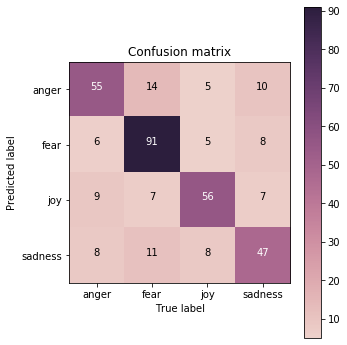

In [60]:
# plot the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

Each row represents one emotion predicted by the model. Each column represents the actual lables for eahc testing sample. The diagonal are the correct predictions. To read further into the result, we can see that 'sadness' and 'fear' tweets are harder to predict correctly. The 'fear' tweets' prediction spread out the most, all other three categories shared about the same incorrect predictions that belongs to 'fear'. Both 'anger' and 'sadness' tweets have a tendency to be mistaken as 'fear'. Overall, if we can find a better way to distinquish 'fear' tweets between others, the result should improve noticeably. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
from sklearn.naive_bayes import MultinomialNB

## build Naive Bayes model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## prediction!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)


In [39]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [40]:
## precision, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



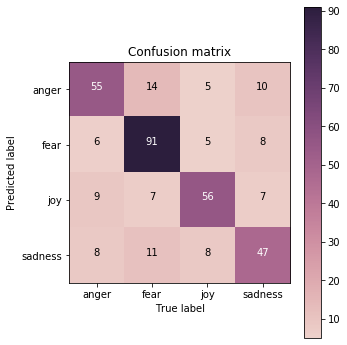

In [41]:
# plot the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Overall, the results from Naive Bayes model are better then that of Decision Tree. Especially the classification of 'fear' tweets improves a lot. Both the false positive and false negitive for 'fear' drop down, resulting in a better model. The reason for this difference may be the fact that 'fear' is the largest class in the testing set and 'fear' tweets occur in all or most of high level classification features in Dicision Tree. In another word, the features used in Dicision Tree were unable to distinguish between 'fear' tweets and other classes.

Train a NN model with 500 most frequent words as bag of word features.

In [43]:
import tensorflow as tf

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


In [46]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return tf.keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)


In [47]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 257us/sample - loss: 1.3240 - accuracy: 0.3651 - val_loss: 1.2671 - val_accuracy: 0.4294
Epoch 2/25
3613/3613 [==============================] - 0s 88us/sample - loss: 0.9937 - accuracy: 0.6452 - val_loss: 0.9424 - val_accuracy: 0.6311
Epoch 3/25
3613/3613 [==============================] - 0s 92us/sample - loss: 0.5876 - accuracy: 0.7938 - val_loss: 0.7838 - val_accuracy: 0.6801
Epoch 4/25
3613/3613 [==============================] - 0s 85us/sample - loss: 0.4157 - accuracy: 0.8480 - val_loss: 0.7872 - val_accuracy: 0.7089
Epoch 5/25
3613/3613 [==============================] - 0s 89us/sample - loss: 0.3244 - accuracy: 0.8799 - val_loss: 0.8463 - val_accuracy: 0.6974
Epoch 6/25
3613/3613 [==============================] - 0s 90us/sample - loss: 0.2727 - accuracy: 0.9040 - val_loss: 0.8413 - val_accuracy: 0.6916
Epoch 7/25
3613/3613 [==============================] - 0s 86us/sample

In [51]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

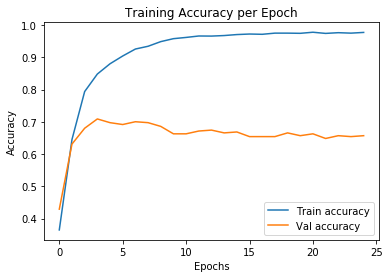

In [52]:
# Plot Training Accuracy
plt.plot(training_log.index, training_log.accuracy, label='Train accuracy')
plt.plot(training_log.index, training_log.val_accuracy, label='Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.show()

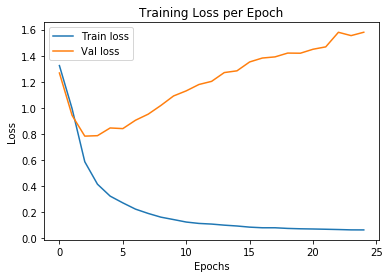

In [53]:
# Plot Traing Loss
plt.plot(training_log.index, training_log.loss, label='Train loss')
plt.plot(training_log.index, training_log.val_loss, label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


There are several ways to deal with this problem. One way is to use a seqence model such as RNN or LSTM to train the sentense as a sequence of word vectors. Another way is to use some mathmatical transformation to use one vector to represent the whole sentense. We can concat several word vectors together and get a large vector or we can perform summation or take average of all the word vector and use the result as the representation of whole sentense.  

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [57]:
# Load Google pre-trained model
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "Google300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


load ok


In [58]:
# the list of seed words
word_list = ['happy', 'angry', 'sad', 'fear']

# find the 15 most similar words to the seed words with cosine similarity
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=15)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=15)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=15)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=15)]        

target_words = happy_words + angry_words + sad_words + fear_words


cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn


/home/nlplab/kevintuan/.local/lib/python3.6/site-packages/gensim-3.6.0-py3.6-linux-x86_64.egg/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


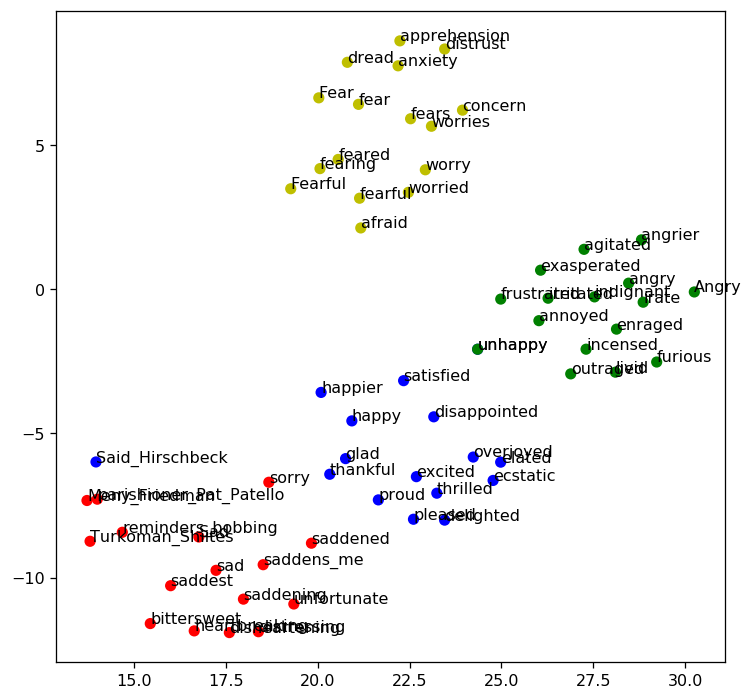

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare pre-trained word vectors 
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

End of lab exercise

In [1]:
import pandas as pd
import numpy as np
import json
import re
import scipy.sparse
import os

In [17]:
# Load HW tweet data
with open('tweets_DM.json') as f:
    data = [json.loads(line) for line in f]


In [255]:
# see the data format
data[0]

{'_score': 391,
 '_index': 'hashtag_tweets',
 '_source': {'tweet': {'hashtags': ['Snapchat'],
   'tweet_id': '0x376b20',
   'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}},
 '_crawldate': '2015-05-23 11:42:47',
 '_type': 'tweets'}

In [256]:
# only keep the data under 'tweet'
tw = [ i['_source']['tweet'] for i in data ]

In [257]:
tw[0]

{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}

In [258]:
# save the tweets into dataframe
tweets = pd.DataFrame(tw, columns = ['hashtags', 'tweet_id', 'text'])

In [259]:
tweets

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [50]:
# load training / testing identifier
identity = pd.read_csv("data_identification.csv") 

In [53]:
identity

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [260]:
tweets = tweets.merge(identity, left_on = 'tweet_id', right_on = 'tweet_id' )

In [261]:
tweets

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train


I want to keep track of the number of uppercase characters / question marks / exclammation marks are in a tweet as potential features 

In [115]:
def Upper(sent):
    return len(re.findall(r'[A-Z]',sent))
def Question(sent):
    return len(re.findall(r'\?',sent))
def Exclam(sent):
    return len(re.findall(r'\!',sent))

In [262]:
tweets['upper'] = tweets['text'].apply(lambda x: Upper(x))
tweets['question'] = tweets['text'].apply(lambda x: Question(x))
tweets['exclam'] = tweets['text'].apply(lambda x: Exclam(x))


In [263]:
tweets

,hashtags,tweet_id,text,identification,upper,question,exclam
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,5,0,0
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,12,0,0
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,8,0,0
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,8,0,0
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,9,0,0
...,...,...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,7,0,0
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,3,0,0
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,6,0,0
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,3,0,0


In [264]:
# process clean the tweet by getting rid of tailing <LH> and symbols 
def process(sent):
    sent = re.sub('<LH>', '', sent)
    sent = re.sub('@[A-Z0-9a-z_:]+', '', sent)
    sent = re.sub('\#', '', sent)
    return sent

In [265]:
tweets['cleaned'] =  tweets['text'].apply(lambda x: process(x))

In [266]:
tweets

,hashtags,tweet_id,text,identification,upper,question,exclam,cleaned
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,5,0,0,"People who post ""add me on Snapchat"" must be d..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,12,0,0,"As we see, Trump is dangerous to freepress ar..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,8,0,0,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,8,0,0,Now ISSA is stalking Tasha 😂😂😂
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,9,0,0,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,7,0,0,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,3,0,0,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,6,0,0,no card left when I wasn't in so I have no id...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,3,0,0,"Ah, corporate life, where you can date using ..."


Another pre-processing step was the removal of stopwords

In [206]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

stopWords = list(stopwords.words('english'))


After the pre-processing was done, I needed to seperate the training and testing dataset

In [267]:
train_df = tweets[tweets['identification'] == 'train']
test_df = tweets[tweets['identification'] == 'test']

In [179]:
# Load the label / classifier for training data
emotions = pd.read_csv("emotion.csv") 

In [64]:
len(emotions)

1455563

In [65]:
emotions

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [268]:
# get the label for each tweet by dataframe merge
train_df = train_df.merge(emotions, left_on = 'tweet_id', right_on = 'tweet_id' )

In [269]:
train_df

,hashtags,tweet_id,text,identification,upper,question,exclam,cleaned,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,5,0,0,"People who post ""add me on Snapchat"" must be d...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,12,0,0,"As we see, Trump is dangerous to freepress ar...",sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,8,0,0,Now ISSA is stalking Tasha 😂😂😂,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,23,0,3,Thx for the BEST TIME tonight. What stories!...,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,4,0,0,Still waiting on those supplies Liscus.,anticipation
...,...,...,...,...,...,...,...,...,...
1455558,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,22,0,5,I'm SO HAPPY!!! NoWonder the name of this show...,joy
1455559,[],0x38959e,In every circumtance I'd like to be thankful t...,train,7,0,0,In every circumtance I'd like to be thankful t...,joy
1455560,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,2,0,0,there's currently two girls walking around the...,joy
1455561,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,3,0,0,"Ah, corporate life, where you can date using ...",joy


In [270]:
test_df

,hashtags,tweet_id,text,identification,upper,question,exclam,cleaned
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,8,0,0,"Confident of your obedience, I write to you, k..."
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,9,0,0,"""Trust is not the same as faith. A friend is s..."
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,5,3,0,When do you have enough ? When are you satisfi...
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,7,0,0,"God woke you up, now chase the day GodsPlan Go..."
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,6,1,0,"In these tough times, who do YOU turn to as yo..."
...,...,...,...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,8,0,0,"""For this is the message that ye heard from th..."
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,4,1,0,"""There is a lad here, which hath five barley l..."
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,7,0,0,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,3,0,0,I swear all this hard work gone pay off one da...


In [271]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

After all the training data are prepared, I wanted to see the distribution of the labels 

In [75]:
train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

I trained a simple model with 20,000 most frequent words as Tf-Idf features and Naive_bayes algorithm as model  

In [186]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 20000, tokenizer=nltk.word_tokenize)
vectorizer.fit(train_df['cleaned'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7fab52938268>,
                use_idf=True, vocabulary=None)

In [ ]:
# Prepared the data for training
X_train = vectorizer.transform(train_df['cleaned'])
Y_train = train_df['emotion']
X_test = vectorizer.transform(test_df['cleaned'])

In [188]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (1455563, 20000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 20000)


In [189]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, Y_train)]

In [190]:
Y_train_pred = NB_model.predict(X_train)
Y_test_pred = NB_model.predict(X_test)

In [192]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=Y_train, y_pred=Y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))


training accuracy: 0.52


In [194]:
# save the testing result to dataframe 
test_df['NB'] = Y_test_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
test_df

,hashtags,tweet_id,text,identification,upper,question,exclam,cleaned,tokens,NB
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,8,0,0,"Confident of your obedience, I write to you, k...","[confident, obedience, ,, write, ,, knowing, e...",anticipation
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,9,0,0,"""Trust is not the same as faith. A friend is s...","[``, trust, faith, ., friend, someone, trust, ...",anticipation
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,5,3,0,When do you have enough ? When are you satisfi...,"[enough, ?, satisfied, ?, goal, really, money,...",joy
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,7,0,0,"God woke you up, now chase the day GodsPlan Go...","[god, woke, ,, chase, day, godsplan, godswork]",joy
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,6,1,0,"In these tough times, who do YOU turn to as yo...","[tough, times, ,, turn, symbol, hope, ?]",anticipation
...,...,...,...,...,...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,8,0,0,"""For this is the message that ye heard from th...","[``, message, ye, heard, beginning, ,, love, o...",anticipation
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,4,1,0,"""There is a lad here, which hath five barley l...","[``, lad, ,, hath, five, barley, loaves, ,, tw...",anticipation
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,7,0,0,When you buy the last 2 tickets remaining for ...,"[buy, last, 2, tickets, remaining, show, sell,...",joy
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,3,0,0,I swear all this hard work gone pay off one da...,"[swear, hard, work, gone, pay, one, day😈💰💸]",joy


In [197]:
# save the result to file for competition
test_df.to_csv (r'NB.csv', index = None, header=True, columns = ['tweet_id', 'NB']) 

I then trained another model with the same approach except removed the stopwords

In [219]:
new_vectorizer = TfidfVectorizer(analyzer = 'word', max_features = 20000, 
                                 tokenizer=nltk.word_tokenize, stop_words = stopWords, dtype = '')
new_vectorizer.fit(train_df['cleaned'])


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7fab52938268>,
                use_idf=True, vocabulary=None)

In [272]:
X_train = vectorizer.transform(train_df['cleaned'])
Y_train = train_df['emotion']
X_test = vectorizer.transform(test_df['cleaned'])

In [221]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model = NB_model.fit(X_train, Y_train)
Y_train_pred = NB_model.predict(X_train)
Y_test_pred = NB_model.predict(X_test)

In [222]:
acc_train = accuracy_score(y_true=Y_train, y_pred=Y_train_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.52


In [223]:
# save the result to dataframe
test_df['New_NB'] = Y_test_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [224]:
# sent the result to competition
test_df.to_csv (r'NB2.csv', index = None, header=True, columns = ['tweet_id', 'NB'], index_label = ['id', 'emotion']) 

The two approaches produced very similar result. It seems that Tf-Idf already disregard most if not all of the stopwords

I then tried to sent the data to a NN model. However, the dimension of my Tf-Idf was too large, and training shut down due to out of memeory problem. I also tried to write a generator to resolve this issue, but it failed too. I was too inexperienced with keras models and failed to write a correct generator.

In [273]:
import tensorflow as tf
import tensorflow.keras as keras

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)


X_train.shape:  (1455563, 20000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 20000)


In [283]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [274]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(Y_train)


def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

Y_train_one = label_encode(label_encoder, Y_train)



In [275]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  20000
output_shape:  8


In [276]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=200)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 8
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20000)]           0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               4000200   
_________________________________________________________________
re_lu_2 (ReLU)               (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                12864     
_________________________________________________________________
re_lu_3 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 520       
_________________________________________________________________
softmax_1 (Softmax)          (None, 8)                 0   

In [341]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')


model.fit_generator(generator=training_batch_generator,
                   steps_per_epoch = int(X_split_train.shape[0] // 64),
                   epochs = 10,
                   verbose = 1,
                   workers = 4,
                   validation_data = validation_batch_generator,
                   validation_steps = int(X_split_val.shape[0] // 64))
print('training finish')


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/utils/data_utils.py", line 742, in _run
    sequence = list(range(len(self.sequence)))
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/utils/data_utils.py", line 396, in __len__
    raise NotImplementedError
NotImplementedError



Epoch 1/10


KeyboardInterrupt: 

I then tried to use sparse matrix to solve the probelm, but the syntax was wrong and memory still too large to run.

In [305]:
from sklearn.model_selection import train_test_split
X_split_train, X_split_val, y_split_train, y_split_val = train_test_split(
    X_train, Y_train_one, test_size=0.2, random_state=1)


In [342]:
scipy.sparse.save_npz('X_split_train', X_split_train)

In [343]:
scipy.sparse.save_npz('X_split_val', X_split_val)

In [ ]:
import numpy as np
from tensorflow import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=64, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.load('data/' + ID + '.npy')

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [304]:
#sparse_matrix = scipy.sparse.load_npz('/tmp/sparse_matrix.npz')


(1455563, 8)

In [337]:
training_batch_generator = My_Custom_Generator(X_train_filenames, y_split_train)
validation_batch_generator = My_Custom_Generator(X_val_filenames, y_split_val)

In [339]:
X_split_train.shape[0]

1164450

# Conclusion:

I tried two approaches for this homework.  
I first expanded on the method we did in the Lab. And found out that simply increasing the feature size for one-hot encoding generated a reasonable baseline. (0.42) I did some improvement by changing the vectorizer to Tf-Idf. This extracted the words with the most meaning as the features.  
Then I tried to run the data in a neural network. I was unable to run it due to the size of my features. In hindsight I should use word vectors to represent each word. However, I would have to decide how to represent the tweet as a whole. Maybe use a sequence to sequence model that treat each word vector as one input?   